## Data Collection

In [1]:
import os

In [2]:
current_dir = os.getcwd()
current_dir

'/workspace/image-manipulation-test'

In [3]:
os.chdir('/workspace/image-manipulation-test')
print("You set a new current directory")

You set a new current directory


In [4]:
current_dir = os.getcwd()
current_dir

'/workspace/image-manipulation-test'

In [5]:
import matplotlib.pyplot as plt

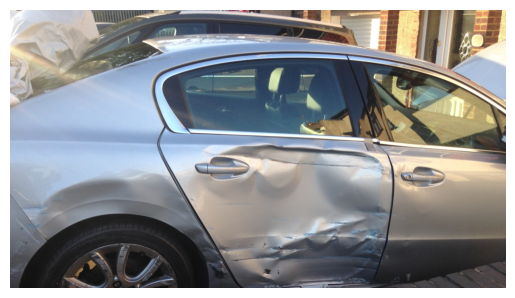

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread("images/damaged-car.jpg")

plt.imshow(img)
plt.axis('off')
plt.show()

In [8]:
from PIL import Image, ImageChops, ImageEnhance
import numpy as np

# Load and save the image with a lower quality to create a base for ELA
img = Image.open("images/damaged-car.jpg")
ela_img = img.copy()
ela_img.save("images/ela_image.jpg", 'JPEG', quality=95)

In [9]:
# Load the saved image and calculate the difference
ela_img = Image.open("images/ela_image.jpg")
diff_img = ImageChops.difference(img, ela_img)

In [10]:
# Enhance the difference image to make it more visible
extrema = diff_img.getextrema()
max_diff = max([ex[1] for ex in extrema])
scale = 255.0 / max_diff if max_diff else 1.0
diff_img = ImageEnhance.Brightness(diff_img).enhance(scale)

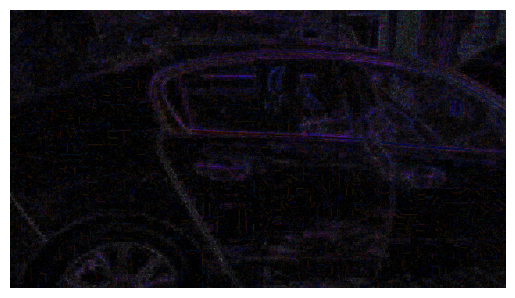

In [11]:
# Display the ELA result
plt.imshow(diff_img)
plt.axis('off')
plt.show()

In [20]:
# Convert the ELA result to grayscale
ela_img_gray = diff_img.convert('L')

In [21]:
# Convert the grayscale image to a numpy array for OpenCV
ela_img_np = np.array(ela_img_gray)

In [22]:
# Apply Canny edge detection
edges = cv2.Canny(ela_img_np, 100, 200)

(np.float64(-0.5), np.float64(1109.5), np.float64(622.5), np.float64(-0.5))

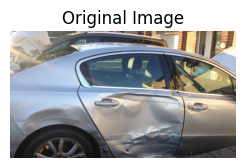

In [23]:
# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original Image")
plt.axis('off')

(np.float64(-0.5), np.float64(1109.5), np.float64(622.5), np.float64(-0.5))

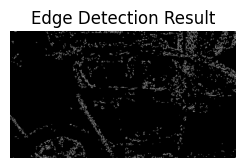

In [24]:
# Display the edge-detected image
plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title("Edge Detection Result")
plt.axis('off')

In [ ]:
plt.show()

In [14]:
from PIL import Image

# Open the image
img = Image.open("images/damaged-car.jpg")

# Extract EXIF data
exif_data = img._getexif()

# Display EXIF data
if exif_data:
    for tag, value in exif_data.items():
        print(f"{tag}: {value}")
else:
    print("No EXIF metadata found.")

No EXIF metadata found.


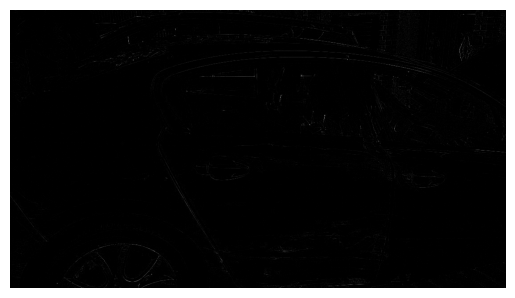

In [16]:
import cv2

# Convert image to grayscale
gray_img = cv2.cvtColor(np.array(img), cv2.COLOR_BGR2GRAY)

# Apply a median filter to the grayscale image
noise_img = cv2.medianBlur(gray_img, 3)

# Subtract the filtered image from the original to get the noise pattern
noise_pattern = cv2.subtract(gray_img, noise_img)

plt.imshow(noise_pattern, cmap='gray')
plt.axis('off')
plt.show()

In [19]:
# import torch
# from torchvision import models, transforms

# # Load a pretrained model (for example, ResNet)
# model = models.resnet50(pretrained=True)
# model.eval()

# # Prepare the image
# preprocess = transforms.Compose([
#     transforms.Resize(256),
#     transforms.CenterCrop(224),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
# ])

# input_tensor = preprocess(img)
# input_batch = input_tensor.unsqueeze(0)

# with torch.no_grad():
#     output = model(input_batch)

# # Example output
# print(output)